## Import necessary packages

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

## Import the MDS Cahn Hilliard dataset

In [3]:
from mdsdata import load_CahnHilliard

images, energies = load_CahnHilliard()

print("The dataset contains", images.shape[0], "images.")
print("They are", images.shape[1], "x", images.shape[2], "pixel in size.")
print(f"The minimum energy is: {energies.min(): .1f}")
print(f"The maximum energy is: {energies.max(): .1f}")

The dataset contains 17866 images.
They are 64 x 64 pixel in size.
The minimum energy is:  457.7
The maximum energy is:  1099.8


## Reshape all of the images into a single vector for each 64x64 image

In [22]:
images = images.reshape(-1, 64 * 64)

# Center around the mean for each image
mu = images.mean(axis=0)
images = images - mu
images.shape

(17866, 4096)

## Calculate the standard deviation and standardize for each image and ensure that if there is no variation, then create a small variation to ensure that we don't divide by 0.

In [8]:
sigma = images.std(axis=0)
mask = np.isclose(sigma, 0)
sigma[mask] = 1e-12
images = images / sigma

In [9]:
data_cov = np.cov(images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(data_cov)

In [11]:
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [20]:
U = eigenvectors[:, :2]
images_proj = images @ U

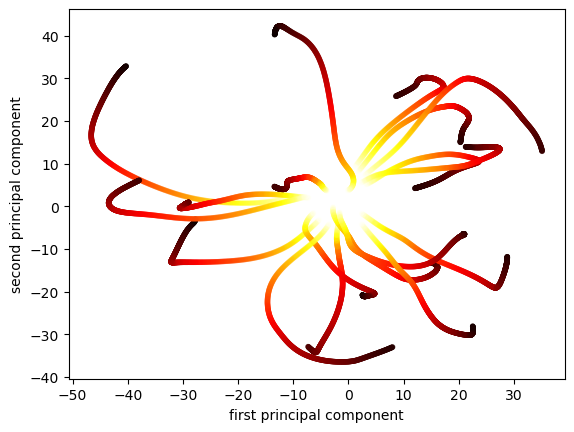

In [21]:
fig, ax = plt.subplots()
ax.scatter(images_proj[:,0], images_proj[:,1], c=energies, cmap='hot', marker='.', alpha=0.3)
ax.set(xlabel='first principal component', ylabel='second principal component');

In [14]:
cumsum_eigenvalues = 100 * np.cumsum(eigenvalues) / np.sum(eigenvalues)

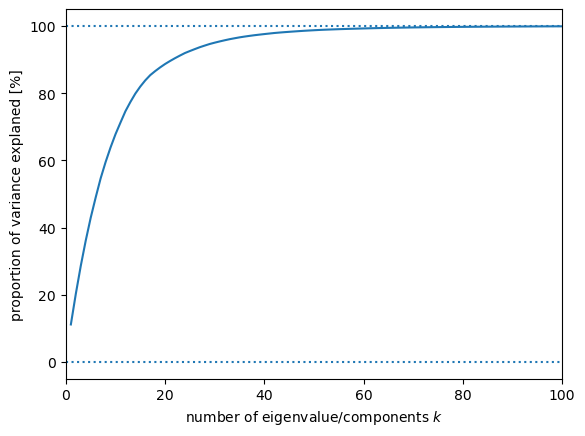

In [26]:
fig, ax = plt.subplots()
ax.axhline(0, ls=':')
ax.axhline(100, ls=':')
ax.plot(np.arange(1, cumsum_eigenvalues.size + 1), cumsum_eigenvalues)
ax.set(xlabel='number of eigenvalue/components $k$',
       ylabel='proportion of variance explaned [%]');
ax.set_xlim(0,100)

plt.show()